#Análise de reservas em hotéis

###**Resort Hotel e City Hotel**

###**Problema de negócio**: Ambos os hóteis a serem analisados vem notando altas taxas de cancelamento, resultando em receitas menores e um uso abaixo do esperado dos quartos.
###**Objetivo da análise:** Buscar entender o que tem gerado as altas taxas de cancelamento e como o problema poderia ser contornado, aumentando a eficiência na geração de receita.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

resort_hotel = pd.read_csv("H1.csv")
city_hotel = pd.read_csv("H2.csv")

######Abaixo segue o dicionário das variáveis para facilitar o entendimento

##### Descrição do dataset

In [ ]:
city_hotel.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,5134.00000,5134.000000,5134.0,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5130.000000,5134.000000,5134.0,5134.0,5134.0,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000
mean,0.34028,59.336580,2015.0,36.368134,14.583950,0.777756,2.047721,1.816712,0.047758,0.005649,0.0,0.0,0.0,0.147059,1.954227,90.681165,0.012855,0.383132
std,0.47385,49.793371,0.0,3.765538,8.104775,0.881153,1.277059,0.435724,0.285921,0.074952,0.0,0.0,0.0,0.525220,10.457676,34.461909,0.112662,0.719788
min,0.00000,0.000000,2015.0,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,16.000000,2015.0,33.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,65.000000,0.000000,0.000000
50%,0.00000,53.000000,2015.0,37.000000,14.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,90.000000,0.000000,0.000000
75%,1.00000,88.000000,2015.0,39.000000,21.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,108.000000,0.000000,1.000000
max,1.00000,216.000000,2015.0,43.000000,31.000000,9.000000,20.000000,3.000000,3.000000,1.000000,0.0,0.0,0.0,20.000000,89.000000,250.000000,1.000000,4.000000


In [ ]:
resort_hotel.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5198.0,5198.0,5198.0,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000
mean,0.465666,78.022697,2015.281016,30.895364,15.506444,1.203308,3.279862,1.963647,0.112714,0.014426,0.0,0.0,0.0,0.208157,1.704502,87.000766,0.090419,0.587149
std,0.498868,64.977611,0.449538,14.052210,8.991184,1.184752,2.490297,1.538410,0.439916,0.120852,0.0,0.0,0.0,0.607625,13.289151,49.541669,0.288148,0.817363
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,2015.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,50.850000,0.000000,0.000000
50%,0.000000,65.000000,2015.000000,33.000000,15.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,73.500000,0.000000,0.000000
75%,1.000000,113.000000,2016.000000,42.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,115.000000,0.000000,1.000000
max,1.000000,737.000000,2016.000000,53.000000,31.000000,13.000000,33.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,122.000000,332.000000,2.000000,4.000000


##### Eliminando valores nulos

In [ ]:
#Removendo valores nulos
city_hotel = city_hotel.dropna()
city_hotel.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

In [ ]:
resort_hotel = resort_hotel.dropna()
resort_hotel.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

##### Correlação dos dados

<ipython-input-24-8b609d463062>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = resort_hotel.corr()


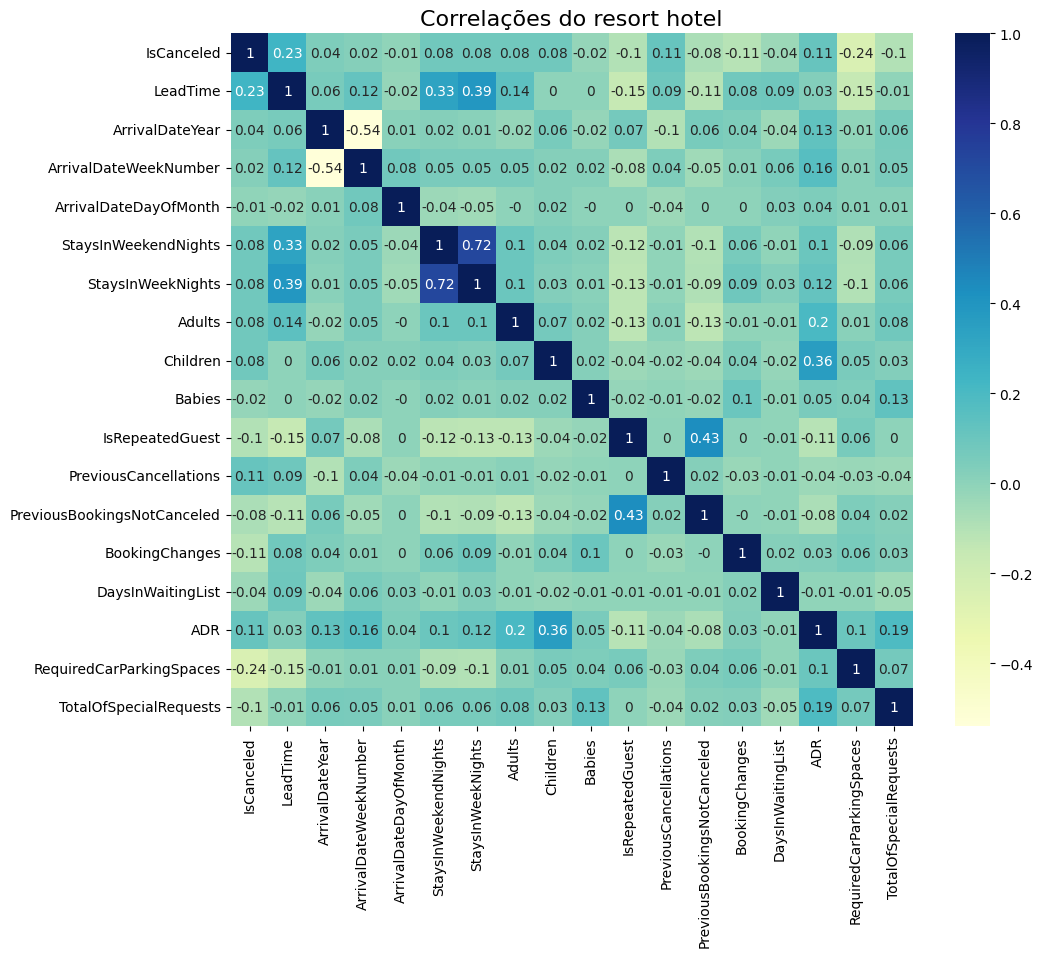

In [ ]:
corr_matrix = resort_hotel.corr()

rounded_corr_matrix = corr_matrix.round(2)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(rounded_corr_matrix, annot=True, cmap="YlGnBu")
ax.set_title("Correlações do resort hotel", fontsize=16)

plt.show()

A partir da matriz de correlações visualizada em um mapa de calor, podemos começar a ter uma noção do quais fatores estão se correlacionando positivamente ou negativamente com os cancelamentos. A correlação que aparece moderada é com o número da semana de chegada (0,35), no entanto não me parece haver causalidade. Algumas correlações, que apesar de fracas valem destacar são:

- Tempo de antecedência: Há uma correlação de 0,25 para o tempo decorrente entre a reserva e a data de chegada e um possível cancelamento.
- ADR: A tarifa média diária, parece ter alguma influência no cancelamento (0,16)
- Cancelamentos prévios: O fato de terem havido cancelamento prévios também se correlaciona (0,11) com novos cancelamentos.

<ipython-input-25-ef9d1d2ef499>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = resort_hotel.corr()


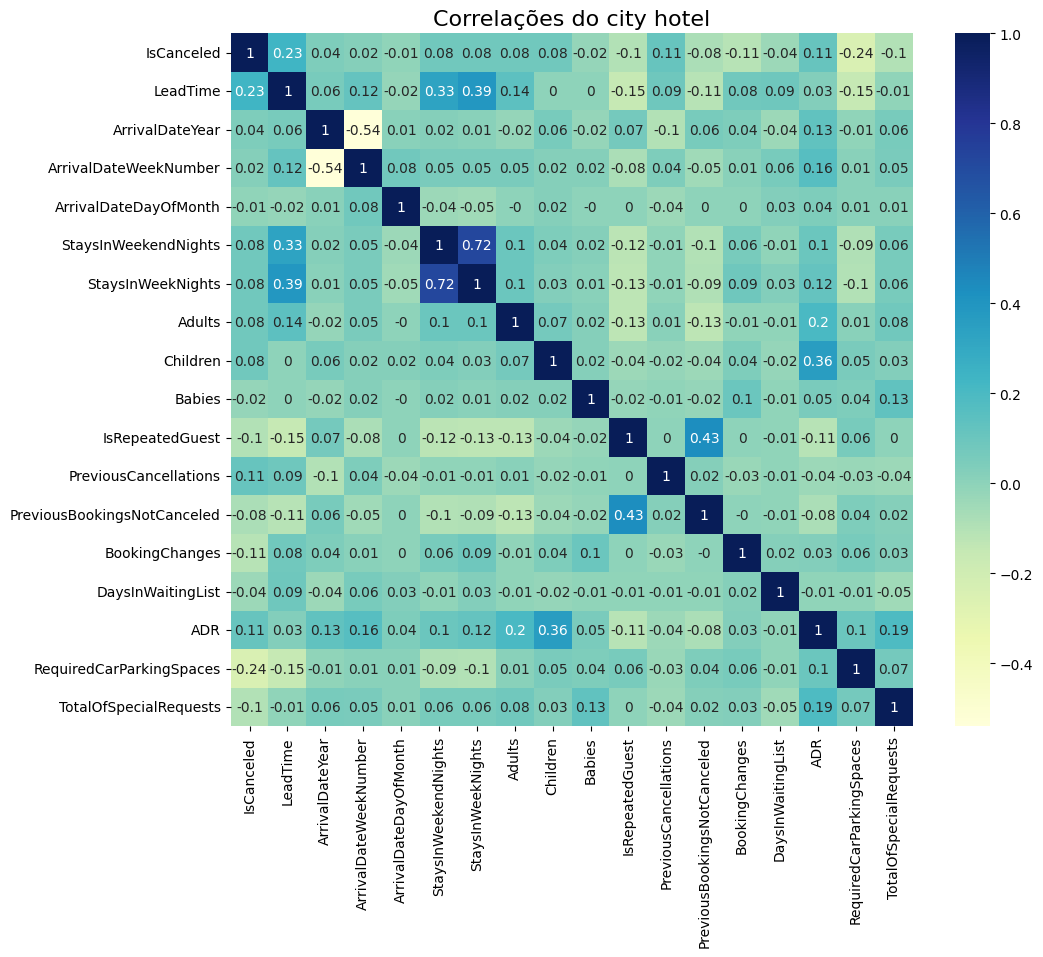

In [ ]:
corr_matrix2 = resort_hotel.corr()
rounded_corr_matrix2 = corr_matrix2.round(2)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(rounded_corr_matrix2, annot=True, cmap="YlGnBu")
ax.set_title("Correlações do city hotel", fontsize=16)

plt.show()

Na matriz do city hotel vemos que o padrão se repete, com a diferença que não há correlação entre a semana de chegada. As variáveis com correlação mais evidente também são ADR, tempo de antecedência e cancelamentos prévios. No entanto, apesar de relevantes não explicam completamente a causa dos cancelamentos.


####Para buscar entender o que vem causando as notadas altas taxas de cancelamento, primeiro vamos verificar como tem se comportado a distribuição dos cancelamentos em valores absolutos e ao longo do tempo nos 2 hotéis.

In [ ]:
qtd_de_cancelamentos2 = resort_hotel.IsCanceled.value_counts().reset_index()
qtd_de_cancelamentos2.columns = ['Foi cancelado?', 'Quantidade']
qtd_de_cancelamentos2['Foi cancelado?'].replace({0: 'Não', 1: 'Sim'}, inplace=True)
qtd_de_cancelamentos2['Porcentagem (%)'] = round((qtd_de_cancelamentos2['Quantidade'] / qtd_de_cancelamentos2['Quantidade'].sum()) * 100, 2)
qtd_de_cancelamentos2.loc[len(qtd_de_cancelamentos2)] = ['Total', qtd_de_cancelamentos2['Quantidade'].sum(), 100.00]
qtd_de_cancelamentos2

,Foi cancelado?,Quantidade,Porcentagem (%)
0,Não,28938,72.24
1,Sim,11122,27.76
2,Total,40060,100.00


In [ ]:
qtd_de_cancelamentos = city_hotel.IsCanceled.value_counts().reset_index()
qtd_de_cancelamentos.columns = ['Foi cancelado?', 'Quantidade']
qtd_de_cancelamentos['Foi cancelado?'].replace({0: 'Não', 1: 'Sim'}, inplace=True)
qtd_de_cancelamentos['Porcentagem (%)'] = round((qtd_de_cancelamentos['Quantidade'] / qtd_de_cancelamentos['Quantidade'].sum()) * 100, 2)
qtd_de_cancelamentos.loc[len(qtd_de_cancelamentos)] = ['Total', qtd_de_cancelamentos['Quantidade'].sum(), 100.00]
qtd_de_cancelamentos

,Foi cancelado?,Quantidade,Porcentagem (%)
0,Não,46228,58.27
1,Sim,33102,41.73
2,Total,79330,100.00


Podemos perceber que a porcentagem de cancelamentos do city_hotel foi maior do que do resort hotel. No entanto, o city hotel também possui uma quantidade de reservas quase 2 vezes maior que o resort.

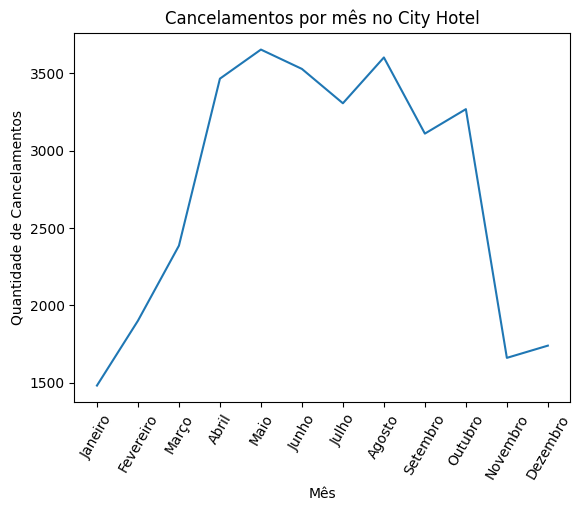

In [ ]:
traduções = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}
# Agrupe os dados por mês
cancelamentos_por_mes = city_hotel.groupby('ArrivalDateMonth')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_mes = cancelamentos_por_mes.replace(traduções)

# Ordenando os meses
cancelamentos_por_mes["ArrivalDateMonth"] = pd.Categorical(cancelamentos_por_mes["ArrivalDateMonth"],
                             categories=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
cancelamentos_por_mes = cancelamentos_por_mes.sort_values(by='ArrivalDateMonth', ascending = True)

# Crie um gráfico de linhas
plt.plot(cancelamentos_por_mes['ArrivalDateMonth'], cancelamentos_por_mes['Cancelamentos'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title("Cancelamentos por mês no City Hotel")
plt.show()

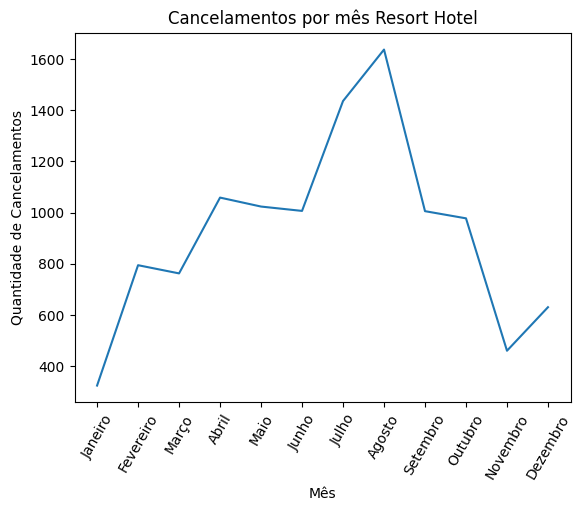

In [ ]:
# Agrupando os dados por mês
cancelamentos_por_mes_resort = resort_hotel.groupby('ArrivalDateMonth')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_mes_resort = cancelamentos_por_mes_resort.replace(traduções)

# Ordenando os meses
cancelamentos_por_mes_resort["ArrivalDateMonth"] = pd.Categorical(cancelamentos_por_mes_resort["ArrivalDateMonth"],
                             categories=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
cancelamentos_por_mes_resort = cancelamentos_por_mes_resort.sort_values(by='ArrivalDateMonth', ascending = True)

# Criando um gráfico de linhas
plt.plot(cancelamentos_por_mes_resort['ArrivalDateMonth'], cancelamentos_por_mes_resort['Cancelamentos'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por mês Resort Hotel')
plt.show()

Observando os 2 gráficos, podemos notar um padrão para um maior número de cancelamentos entre os meses de abril e outubro para os 2 hotéis, demonstrando sazonalidade para a alta de cancelamentos. Sendo que no mês de agosto houve um pico de cancelamentos no Resort hotel, enquanto os picos do City Hotel ocorreram em Maio e Agosto.

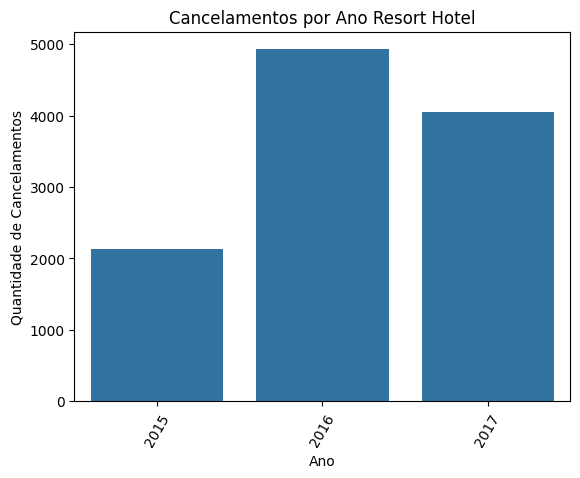

In [ ]:
cancelamentos_por_ano_resort = resort_hotel.groupby('ArrivalDateYear')['IsCanceled'].sum().reset_index(name='Cancelamentos')

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_ano_resort['ArrivalDateYear'], y = cancelamentos_por_ano_resort['Cancelamentos'])

plt.xlabel('Ano')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por Ano Resort Hotel')

plt.show()

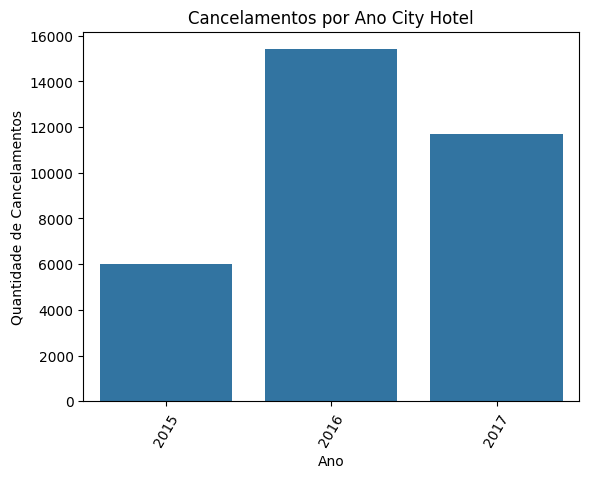

In [ ]:
cancelamentos_por_ano_city = city_hotel.groupby('ArrivalDateYear')['IsCanceled'].sum().reset_index(name='Cancelamentos')

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_ano_city['ArrivalDateYear'], y = cancelamentos_por_ano_city['Cancelamentos'])

plt.xlabel('Ano')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por Ano City Hotel')

plt.show()

Vemos o padrão se repetir também nos cancelamentos anuais, visto que o cancelamento de 2015 para 2016 aumentou em mais de 200% nos 2 hotéis e diminuiu para 2017.

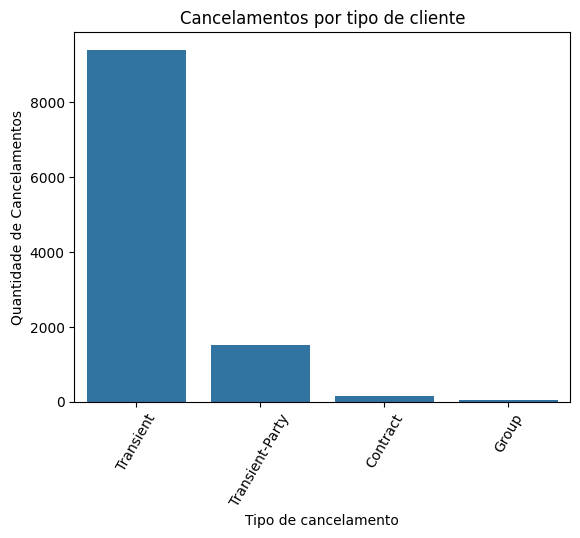

In [ ]:
cancelamentos_por_cliente = resort_hotel.groupby("CustomerType")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_cliente['CustomerType'], y = cancelamentos_por_cliente['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por tipo de cliente')

plt.show()

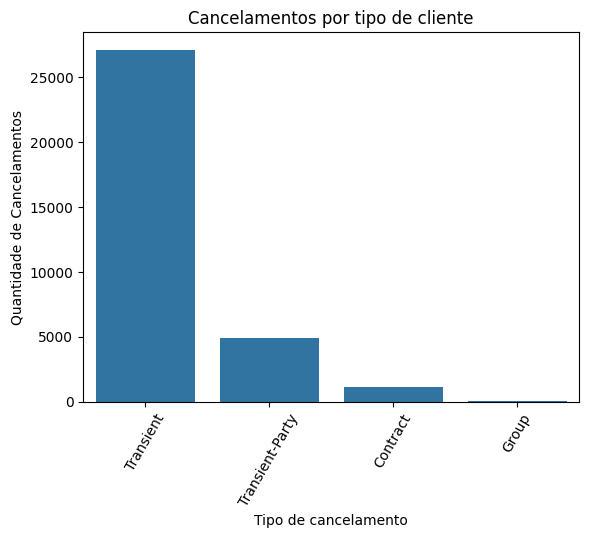

In [ ]:
cancelamentos_por_cliente2 = city_hotel.groupby("CustomerType")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_cliente2['CustomerType'], y = cancelamentos_por_cliente2['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por tipo de cliente')

plt.show()

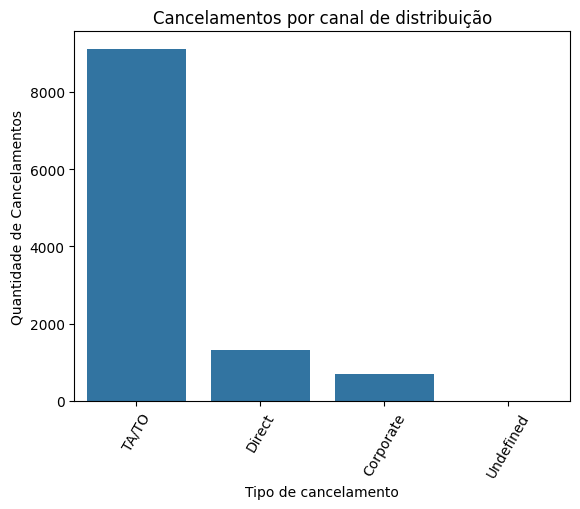

In [ ]:
cancelamentos_por_canal = resort_hotel.groupby("DistributionChannel")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_canal['DistributionChannel'], y = cancelamentos_por_canal['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por canal de distribuição')

plt.show()

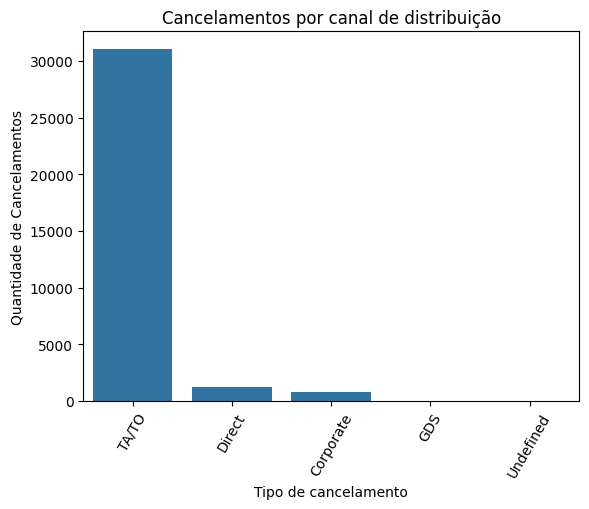

In [ ]:
cancelamentos_por_canal2 = city_hotel.groupby("DistributionChannel")['IsCanceled'].sum().to_frame().reset_index().sort_values(by = 'IsCanceled', ascending = False)

# Criando um gráfico de barras
sns.barplot(x = cancelamentos_por_canal2['DistributionChannel'], y = cancelamentos_por_canal2['IsCanceled'])

plt.xlabel('Tipo de cancelamento')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por canal de distribuição')

plt.show()